In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [88]:
def blank_image(shape=(600, 800, 4),
               rgba=(255, 255, 255, 0)):
    return np.ones(shape, dtype=float) * np.array(rgba) / 255.

img = blank_image()

In [89]:
def display(img):
    plt.figure(figsize=(10, 10))
    if len(img.shape) == 2:
        i = plt.imshow(img, cmap='gray')
    else:
        i = plt.imshow(img)
    plt.tight_layout()
    plt.axis('off')

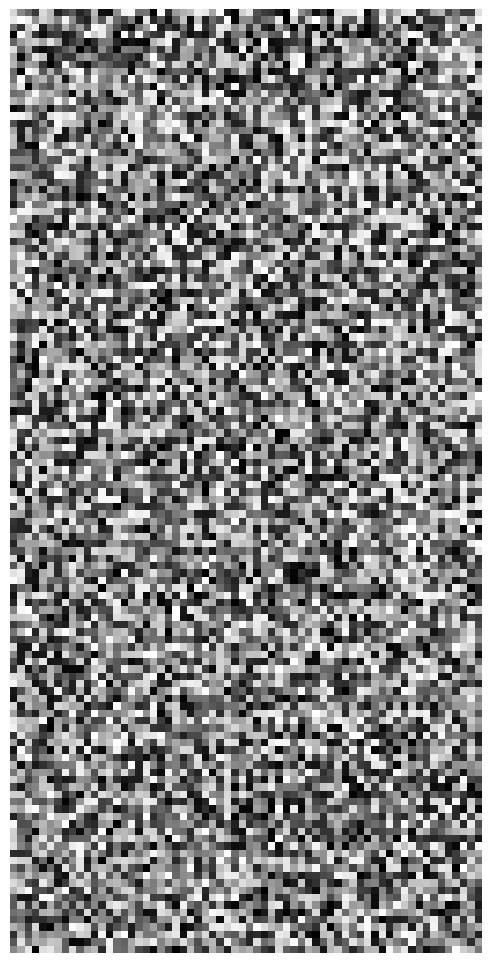

In [90]:
def make_pattern(shape=(16, 16), levels=64):
    return np.random.randint(0, levels - 1, shape) / levels

pattern = make_pattern(shape=(128, 64))
display(pattern)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15512\2798686189.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  depthmap = np.zeros(shape, dtype=np.float)


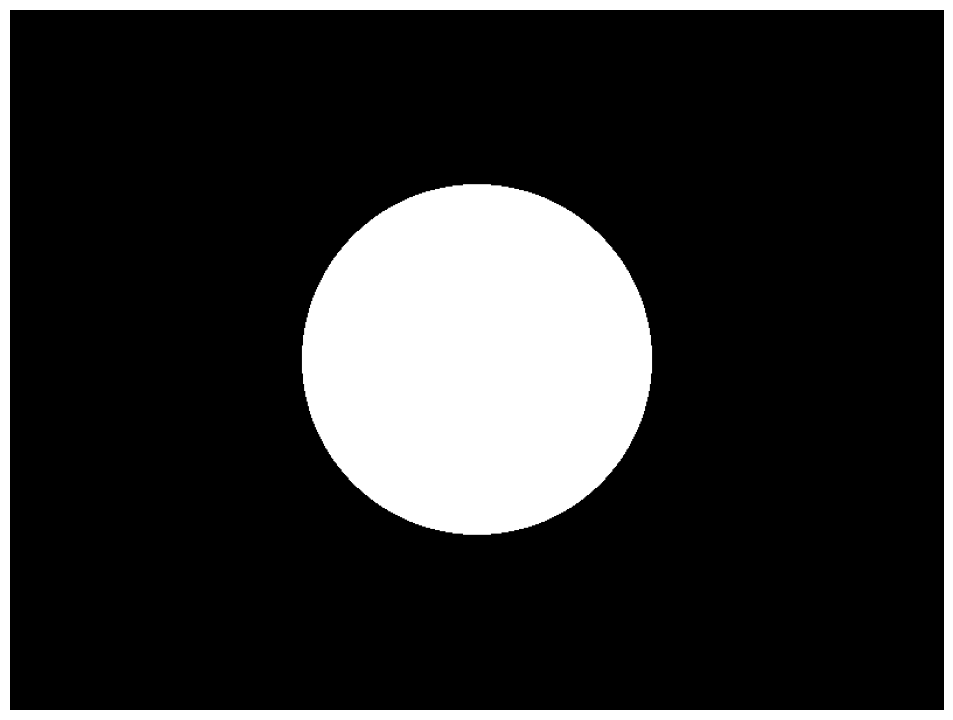

In [91]:
def create_circular_depthmap(shape=(600, 800), center=None, radius=100):
    depthmap = np.zeros(shape, dtype=np.float)
    r = np.arange(depthmap.shape[0])
    c = np.arange(depthmap.shape[1])
    R, C = np.meshgrid(r, c, indexing='ij')
    if center is None:
        center = np.array([r.max() / 2, c.max() / 2])
    d = np.sqrt((R - center[0])**2 + (C - center[1])**2)
    depthmap += (d < radius)
    return depthmap

depthmap = create_circular_depthmap(radius=150)
display(depthmap)

In [92]:
def normalize(depthmap):
    if depthmap.max() > depthmap.min():
        return (depthmap - depthmap.min()) / (depthmap.max() - depthmap.min())
    else:
        return depthmap

In [93]:
def make_autostereogram(depthmap, pattern, shift_amplitude=0.1, invert=False):
    depthmap = normalize(depthmap)
    if invert:
        depthmap = 1 - depthmap
    autostereogram = np.zeros_like(depthmap, dtype=pattern.dtype)
    for r in np.arange(autostereogram.shape[0]):
        for c in np.arange(autostereogram.shape[1]):
            if c < pattern.shape[1]:
                autostereogram[r, c] = pattern[r % pattern.shape[0], c]
            else:
                shift = int(depthmap[r, c] * shift_amplitude * pattern.shape[1])
                autostereogram[r, c] = autostereogram[r, c - pattern.shape[1] + shift]
    return autostereogram

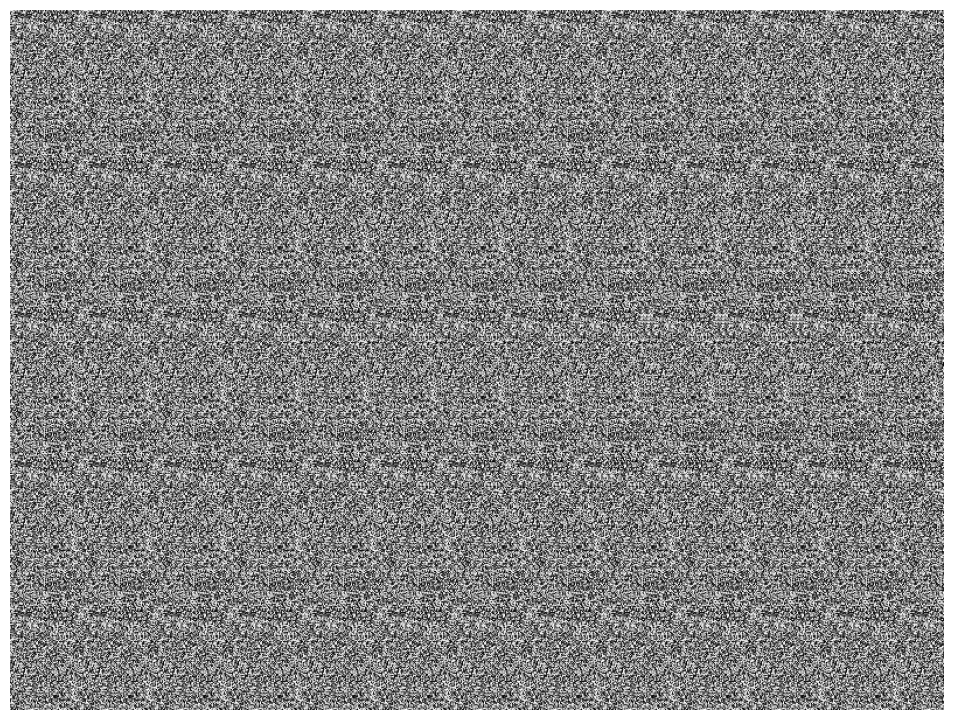

In [94]:
autostereogram = make_autostereogram(depthmap, pattern)
display(autostereogram)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15512\2798686189.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  depthmap = np.zeros(shape, dtype=np.float)


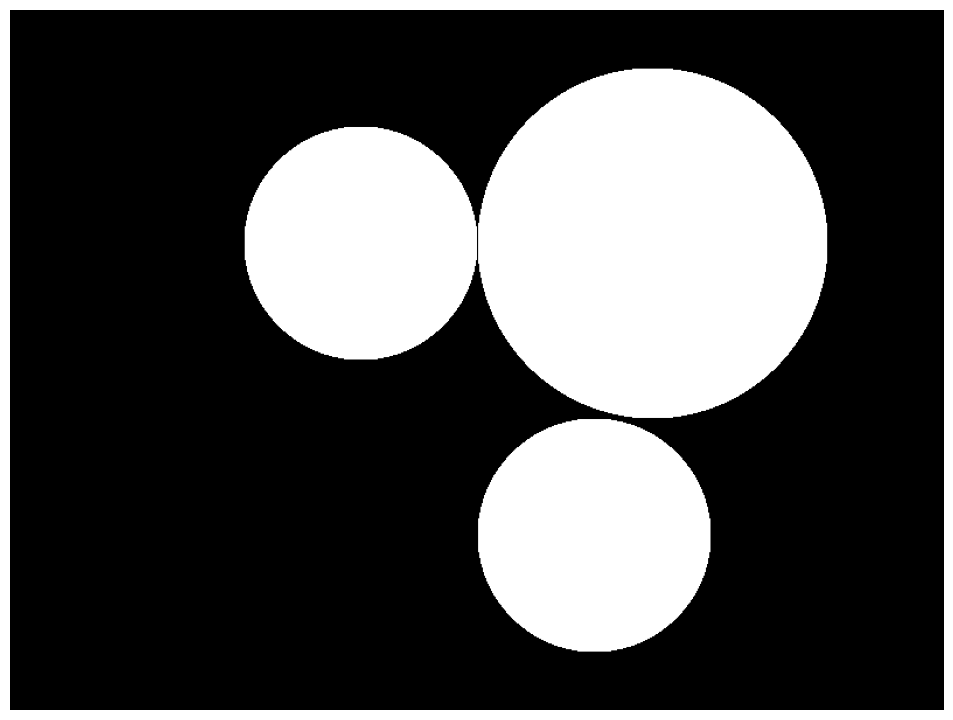

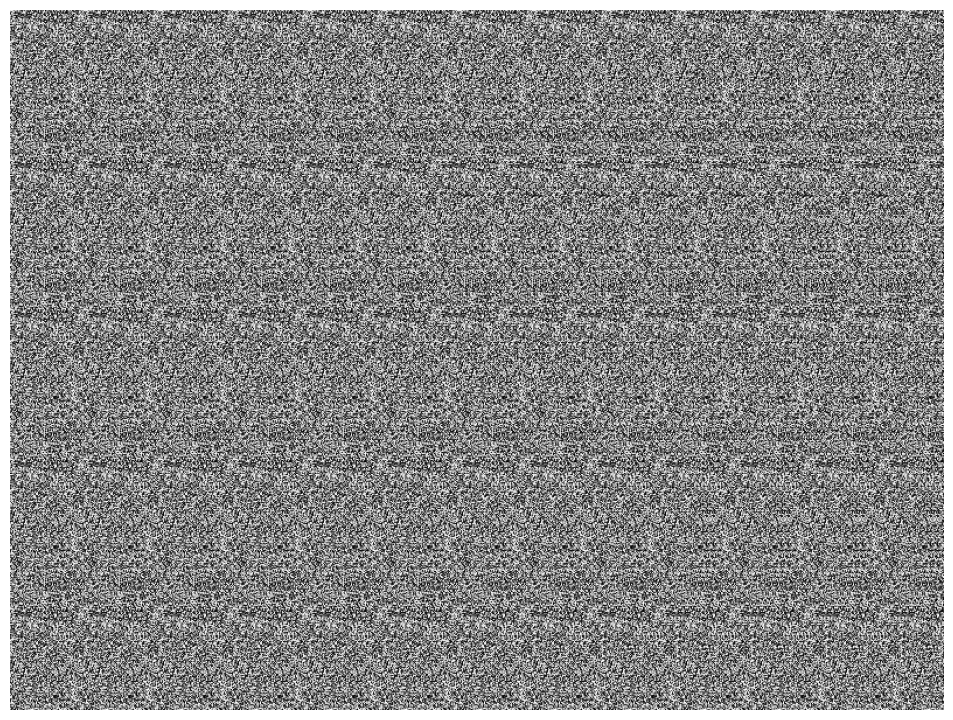

In [95]:
depthmap = create_circular_depthmap(center=(200, 300), radius=100) + \
           create_circular_depthmap(center=(450, 500), radius=100) + \
           create_circular_depthmap(center=(200, 550), radius=150)
depthmap = normalize(depthmap)
display(depthmap)

autostereogram = make_autostereogram(depthmap, pattern)
display(autostereogram)
